In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/Premier league data limpia este 3.csv', sep=';' , decimal=',')
data

,Club Name,Player Name,age,Player Value,Transfer Movement,Year
0,Arsenal FC,Petr Cech,33,1.18553,in,2015
1,Arsenal FC,Matt Macey,20,1.52309,in,2015
2,Arsenal FC,Chuba Akpom,19,2.69919,in,2015
3,Arsenal FC,Alex Iwobi,19,2.86980,in,2015
4,Arsenal FC,Chuba Akpom,20,2.90446,in,2015
...,...,...,...,...,...,...
2724,West Ham United,Winston Reid,33,10.55255,out,2021
2725,West Ham United,Frederik Alves,22,1.06458,in,2021
2726,West Ham United,Conor Coventry,21,10.20157,in,2021
2727,West Ham United,Frederik Alves,22,5.37194,out,2021


In [ ]:
data.isnull().values.any()

False

In [ ]:
df = data[["Year", "Club Name", "Player Value"]].groupby(["Year", "Club Name"],as_index=False).sum()
df["Club Name"].unique()

array(['Arsenal FC', 'Chelsea FC', 'Crystal Palace', 'Everton FC',
       'Leicester City', 'Liverpool FC', 'Manchester City',
       'Manchester United', 'Southampton FC', 'Tottenham Hotspur',
       'West Ham United'], dtype=object)

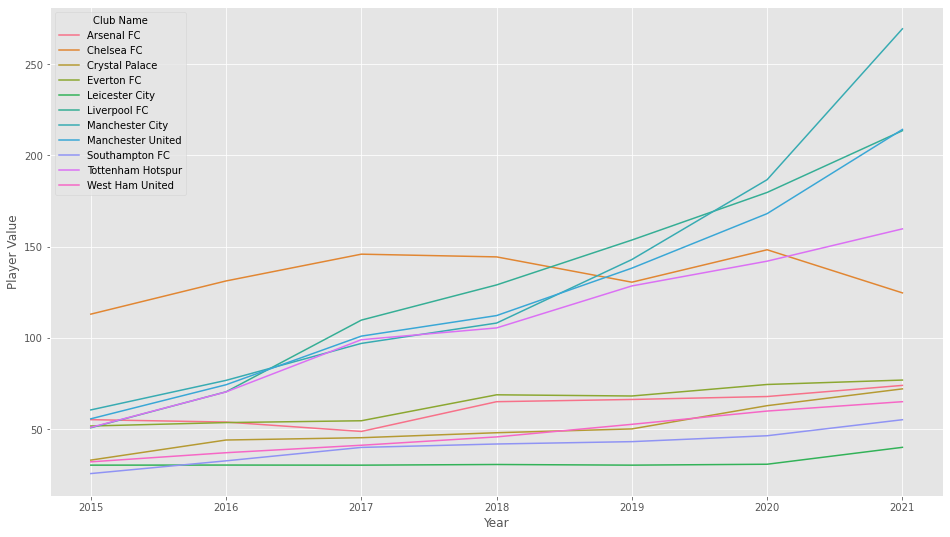

In [ ]:
import seaborn as sns
sns.lineplot(data=df, x="Year", y="Player Value",  hue="Club Name")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2729 entries, 0 to 2728
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Club Name          2729 non-null   object 
 1   Player Name        2729 non-null   object 
 2   age                2729 non-null   int64  
 3   Player Value       2729 non-null   float64
 4   Transfer Movement  2729 non-null   object 
 5   Year               2729 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 128.0+ KB


In [ ]:
data.describe()

,age,Player Value,Year
count,2729.000000,2729.000000,2729.000000
mean,24.434958,2.372956,2017.799194
std,4.269886,3.023692,2.018241
min,16.000000,0.001070,2015.000000
25%,21.000000,0.675800,2016.000000
50%,23.000000,1.430670,2018.000000
75%,27.000000,2.889370,2020.000000
max,44.000000,59.466360,2021.000000


In [ ]:
posiciones = pd.read_csv('/content/Posiciones cuadros - Hoja 1-5.csv')

posiciones["Club Name"].unique()

array(['Arsenal FC', 'Chelsea FC', 'Crystal Palace', 'Everton FC',
       'Leicester City', 'Liverpool FC', 'Manchester City',
       'Manchester United', 'Southampton FC', 'Tottenham Hotspur',
       'West Ham United'], dtype=object)

In [ ]:
posiciones.describe() 

,2015,2016,2017,2018,2019,2020,2021
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,6.818182,6.545455,6.636364,7.181818,6.909091,7.454545,6.818182
std,4.354726,4.227615,4.249064,4.976308,4.592484,5.106146,4.622081
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000
50%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
75%,10.500000,9.000000,9.500000,10.000000,9.500000,11.500000,9.000000
max,14.000000,15.000000,14.000000,17.000000,16.000000,16.000000,15.000000


In [ ]:
df_pos = pd.melt(posiciones, id_vars = ["Club Name"], var_name = "Year")


In [ ]:
df_pos.loc[df_pos["Club Name"] == "Arsenal FC",:] #Confirmamos que funciona

,Club Name,Year,value
0,Arsenal FC,2015,3
11,Arsenal FC,2016,2
22,Arsenal FC,2017,5
33,Arsenal FC,2018,6
44,Arsenal FC,2019,5
55,Arsenal FC,2020,8
66,Arsenal FC,2021,8


In [ ]:

df_pos.loc[df_pos["Club Name"] == "Manchester City",:]

,Club Name,Year,value
6,Manchester City,2015,2
17,Manchester City,2016,4
28,Manchester City,2017,3
39,Manchester City,2018,1
50,Manchester City,2019,1
61,Manchester City,2020,2
72,Manchester City,2021,1


In [ ]:

df_pos.loc[df_pos["Club Name"] == "Chelsea FC",:]

,Club Name,Year,value
1,Chelsea FC,2015,1
12,Chelsea FC,2016,10
23,Chelsea FC,2017,1
34,Chelsea FC,2018,5
45,Chelsea FC,2019,3
56,Chelsea FC,2020,4
67,Chelsea FC,2021,4


In [ ]:

df_pos.loc[df_pos["Club Name"] == "Manchester United",:]

,Club Name,Year,value
7,Manchester United,2015,4
18,Manchester United,2016,5
29,Manchester United,2017,6
40,Manchester United,2018,2
51,Manchester United,2019,6
62,Manchester United,2020,3
73,Manchester United,2021,2


In [ ]:
#Vemos que "Year" esta como object . Para poder utilizar la funcion de merge necesitamos que Year en df_pos sea un int64
df_pos['Year'] = df_pos['Year'].astype(int)
df_pos.dtypes

Club Name    object
Year          int64
value         int64
dtype: object

In [ ]:
df_all=data.merge(df_pos,left_on=["Club Name","Year"], right_on=["Club Name","Year"] ) #Generamos el dataset final a utilizar


In [ ]:
data["Club Name"].unique()
print(data["Club Name"].unique())
print(df_pos["Club Name"].unique())

['Arsenal FC' 'Chelsea FC' 'Crystal Palace' 'Everton FC' 'Leicester City'
 'Liverpool FC' 'Manchester City' 'Manchester United' 'Southampton FC'
 'Tottenham Hotspur' 'West Ham United']
['Arsenal FC' 'Chelsea FC' 'Crystal Palace' 'Everton FC' 'Leicester City'
 'Liverpool FC' 'Manchester City' 'Manchester United' 'Southampton FC'
 'Tottenham Hotspur' 'West Ham United']


In [ ]:
df_all.columns #Confirmamos que no quedaron columnas repetidas

Index(['Club Name', 'Player Name', 'age', 'Player Value', 'Transfer Movement',
       'Year', 'value'],
      dtype='object')

In [ ]:
from traitlets.traitlets import ClassBasedTraitType
df_all.rename(columns = {'value':'Position'}, inplace = True) #Renombramos la columna "value" como "Position"
df_all['Club Name']

0            Arsenal FC
1            Arsenal FC
2            Arsenal FC
3            Arsenal FC
4            Arsenal FC
             ...       
2724    West Ham United
2725    West Ham United
2726    West Ham United
2727    West Ham United
2728    West Ham United
Name: Club Name, Length: 2729, dtype: object

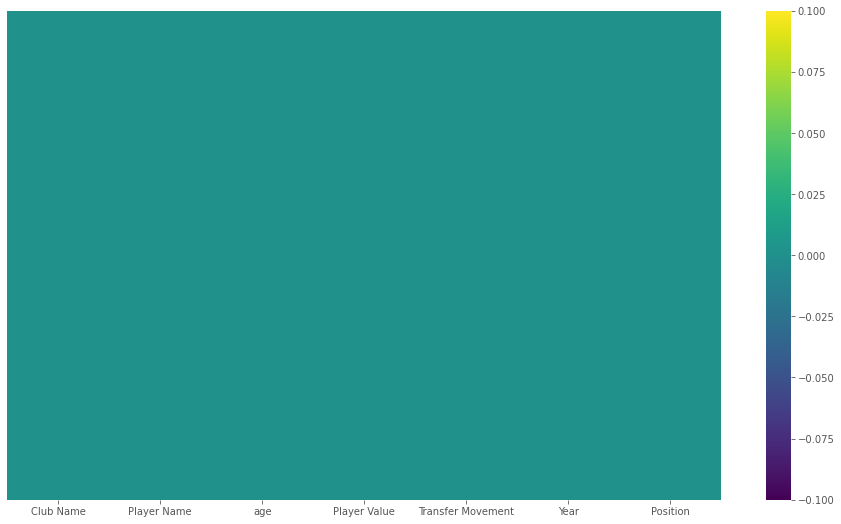

In [ ]:

sns.heatmap(df_all.isnull(),yticklabels=False,cbar=True,cmap='viridis') #Vemos que no hay missing values, es decir, el dataset está completo

In [ ]:
# df_all lista para analizar
# Necesitamos analizar por valor de club a cada año con relación a la posición de la temporada

In [ ]:
#Generamos un df con los clubes, el valor total de inversión ese año y la posición
df1 = df_all[["Year", "Club Name", "Player Value", "Position"]].groupby(["Year", "Club Name","Position"],as_index=False).sum()
df1 #Preguntar por qué aparecen solo 5 equipos por año y como solucionarlo
df_all["Club Name"].unique()


array(['Arsenal FC', 'Chelsea FC', 'Crystal Palace', 'Everton FC',
       'Leicester City', 'Liverpool FC', 'Manchester City',
       'Manchester United', 'Southampton FC', 'Tottenham Hotspur',
       'West Ham United'], dtype=object)

In [ ]:
df2 = df_all
df2 = df.groupby(["Year","Club Name","Player Value",], as_index= False)[['Club Name', 'Player Value']].sum()
df2


,Year,Club Name,Player Value
0,2015,Arsenal FC,55.11616
1,2015,Chelsea FC,112.93804
2,2015,Crystal Palace,32.95080
3,2015,Everton FC,51.63851
4,2015,Leicester City,30.18656
...,...,...,...
72,2021,Manchester City,269.31152
73,2021,Manchester United,214.15740
74,2021,Southampton FC,55.08324
75,2021,Tottenham Hotspur,159.67087


In [ ]:
df_all_final=df1.merge(df2,left_on=["Club Name", "Year"], right_on=["Club Name", "Year"] ) #Generamos el dataset final a utilizar

df_all_final  #eliminar player value_y

,Year,Club Name,Position,Player Value_x,Player Value_y
0,2015,Arsenal FC,3,55.11616,55.11616
1,2015,Chelsea FC,1,112.93804,112.93804
2,2015,Crystal Palace,10,32.95080,32.95080
3,2015,Everton FC,11,51.63851,51.63851
4,2015,Leicester City,14,30.18656,30.18656
...,...,...,...,...,...
72,2021,Manchester City,1,269.31152,269.31152
73,2021,Manchester United,2,214.15740,214.15740
74,2021,Southampton FC,15,55.08324,55.08324
75,2021,Tottenham Hotspur,7,159.67087,159.67087


In [ ]:
df_all_final1 = df_all_final.drop(['Player Value_y'], axis = 1)
df_all_final1

,Year,Club Name,Position,Player Value_x
0,2015,Arsenal FC,3,55.11616
1,2015,Chelsea FC,1,112.93804
2,2015,Crystal Palace,10,32.95080
3,2015,Everton FC,11,51.63851
4,2015,Leicester City,14,30.18656
...,...,...,...,...
72,2021,Manchester City,1,269.31152
73,2021,Manchester United,2,214.15740
74,2021,Southampton FC,15,55.08324
75,2021,Tottenham Hotspur,7,159.67087


In [ ]:
df_all_final1.rename(columns = {'Player Value_x':'Player Value'}, inplace = True) #Renombramos la columna "Player Value_x" como "Player Value"
df_all_final1

,Year,Club Name,Position,Player Value
0,2015,Arsenal FC,3,55.11616
1,2015,Chelsea FC,1,112.93804
2,2015,Crystal Palace,10,32.95080
3,2015,Everton FC,11,51.63851
4,2015,Leicester City,14,30.18656
...,...,...,...,...
72,2021,Manchester City,1,269.31152
73,2021,Manchester United,2,214.15740
74,2021,Southampton FC,15,55.08324
75,2021,Tottenham Hotspur,7,159.67087


In [ ]:
df_all_final1

,Year,Club Name,Position,Player Value
0,2015,Arsenal FC,3,55.11616
1,2015,Chelsea FC,1,112.93804
2,2015,Crystal Palace,10,32.95080
3,2015,Everton FC,11,51.63851
4,2015,Leicester City,14,30.18656
...,...,...,...,...
72,2021,Manchester City,1,269.31152
73,2021,Manchester United,2,214.15740
74,2021,Southampton FC,15,55.08324
75,2021,Tottenham Hotspur,7,159.67087


Dataset terminado. Comenzamos el modelo de la regresión lineal


In [ ]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
Equipos = pd.get_dummies(df_all_final1['Club Name'],drop_first=False)
Equipos


,Arsenal FC,Chelsea FC,Crystal Palace,Everton FC,Leicester City,Liverpool FC,Manchester City,Manchester United,Southampton FC,Tottenham Hotspur,West Ham United
0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
72,0,0,0,0,0,0,1,0,0,0,0
73,0,0,0,0,0,0,0,1,0,0,0
74,0,0,0,0,0,0,0,0,1,0,0
75,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df_all_final1 = pd.concat([df_all_final1, Equipos], axis=1)

In [ ]:
df_all_final1 = df_all_final1.drop(['Club Name'], axis = 1)
df_all_final1

,Year,Position,Player Value,Arsenal FC,Chelsea FC,Crystal Palace,Everton FC,Leicester City,Liverpool FC,Manchester City,Manchester United,Southampton FC,Tottenham Hotspur,West Ham United
0,2015,3,55.11616,1,0,0,0,0,0,0,0,0,0,0
1,2015,1,112.93804,0,1,0,0,0,0,0,0,0,0,0
2,2015,10,32.95080,0,0,1,0,0,0,0,0,0,0,0
3,2015,11,51.63851,0,0,0,1,0,0,0,0,0,0,0
4,2015,14,30.18656,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,2021,1,269.31152,0,0,0,0,0,0,1,0,0,0,0
73,2021,2,214.15740,0,0,0,0,0,0,0,1,0,0,0
74,2021,15,55.08324,0,0,0,0,0,0,0,0,1,0,0
75,2021,7,159.67087,0,0,0,0,0,0,0,0,0,1,0
